# Predivcting heart disease using machine learning 

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

I am going to take the following approach:

1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation



In [1]:
# Regular EDA and plotting the libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

# I want the plot to appear in the notebook 
%matplotlib inline                                                                   

#The models 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier 

#Model evaluation 
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve 

#### Load Data


In [2]:
df = pd.read_csv('data/heart-disease.csv')
df.shape

(303, 14)

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


#### Data Exploration 


In [5]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
# Let's see how many positive (1) and negative (0) samples we have in our dataframe
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [7]:
#Normalized value counts 
df.target.value_counts(normalize = True)

1    0.544554
0    0.455446
Name: target, dtype: float64

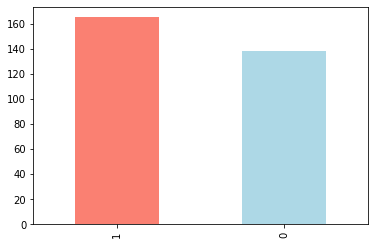

In [7]:
#Plotting the target column values 
df.target.value_counts().plot(kind = 'bar', color = ["salmon", 'lightblue']);

In [9]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
#Describe the data 
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

There are 207 males and 96 females in our study.

In [12]:
#Compare the target column with sex column 
pd.crosstab(df.sex, df.target)

target,0,1
sex,,
0,24,72
1,114,93


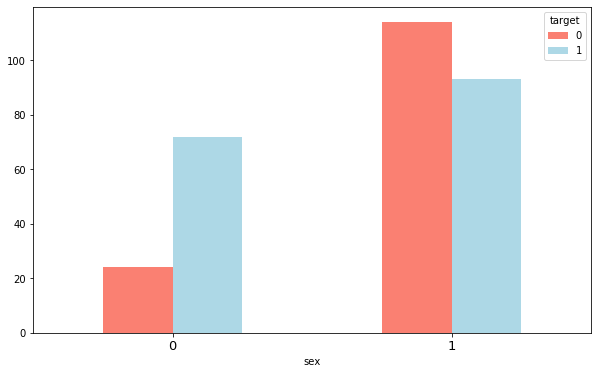

In [14]:
#Making the crosstab visual
# Create a plot 
pd.crosstab(df.sex, df.target).plot(kind = 'bar',
                                    figsize = (10,6),
                                    color = ['salmon', 'lightblue']);
plt.xticks(rotation = 0, size = 13);

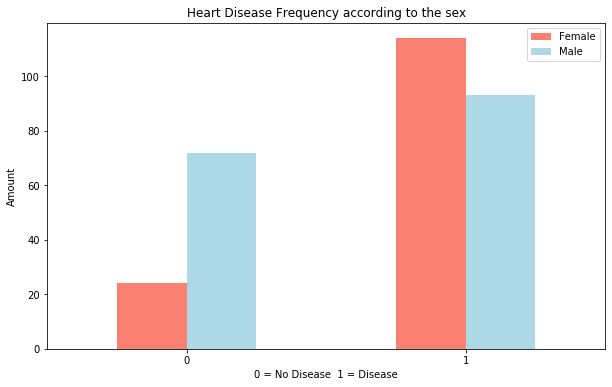

In [15]:
#Create a plot 
pd.crosstab(df.sex, df.target).plot(kind = 'bar', figsize = (10,6), color = ['salmon', 'lightblue']);

#Add some attributes 
plt.title('Heart Disease Frequency according to the sex')
plt.xlabel('0 = No Disease  1 = Disease')
plt.ylabel('Amount')
plt.legend(['Female', 'Male'])
plt.xticks(rotation = 0);            # keep the labels on the x-axis vertical

####  Age vs Max Heart rate for Heart Disease

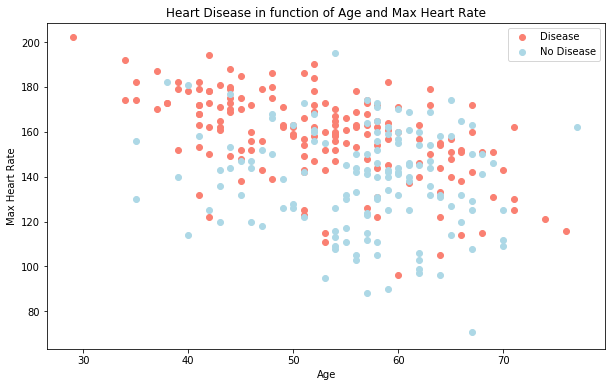

In [16]:
#Create another figure 
plt.figure(figsize=(10,6))

#Start with positive examples 
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c = 'salmon') # define it as a scatter figure 


#Now for negative examples,  we want on the same plot, so we call plt again 
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c = 'lightblue'); # axis always come as 

#Add some helpful info 
plt.title('Heart Disease in function of Age and Max Heart Rate')
plt.xlabel('Age')
plt.legend(['Disease', 'No Disease'])
plt.ylabel('Max Heart Rate');



It seems the younger someone is, the higher their max heart rate (dots are higher on the left of the graph) and the older someone is, the more green dots there are. But this may be because there are more dots all together on the right side of the graph (older participants).


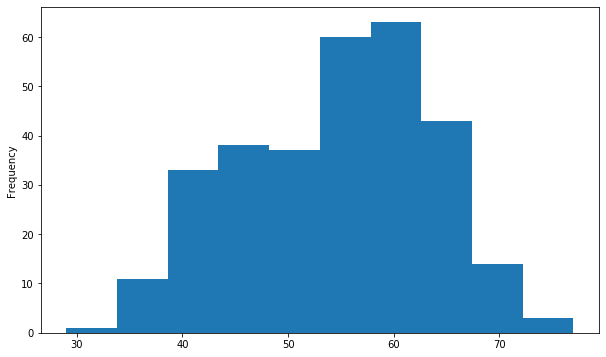

In [17]:
# Checking the distribution of the variable with a histogram 
df.age.plot.hist(figsize = (10,6));


We can see it's a normal distribution but slightly swaying to the right, which reflects in the scatter plot above.


####  Heart Disease Frequency per Chest Pain Type


In [18]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


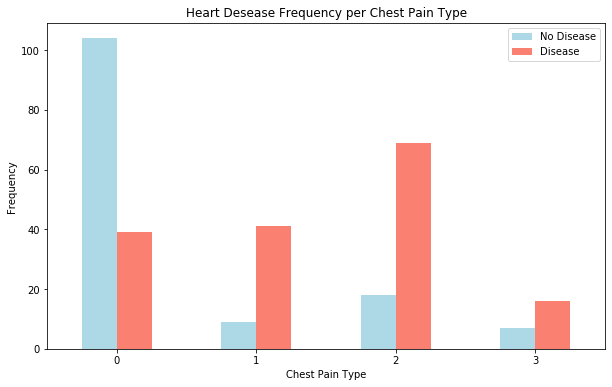

In [19]:
# Create a new crosstab and base plot 
pd.crosstab(df.cp, df.target).plot(kind = 'bar',
                                   figsize = (10,6),
                                   color = ['lightblue', 'salmon'])

#Add some communication to the plot 
plt.title('Heart Desease Frequency per Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Frequency')
plt.legend(['No Disease', 'Disease'])
plt.xticks(rotation = 0);


cp - chest pain type
0: Typical angina: chest pain related decrease blood supply to the heart
1: Atypical angina: chest pain not related to heart
2: Non-anginal pain: typically esophageal spasms (non heart related)
3: Asymptomatic: chest pain not showing signs of disease
It's interesting the atypical agina (value 1) states it's not related to the heart but seems to have a higher ratio of participants with heart disease than not.


In articles, the term (atypical angina) refers to noncardiac causes of chest pain.


#### Correlation between independent variables
Finally, we'll compare all of the independent variables in one hit.

In [19]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


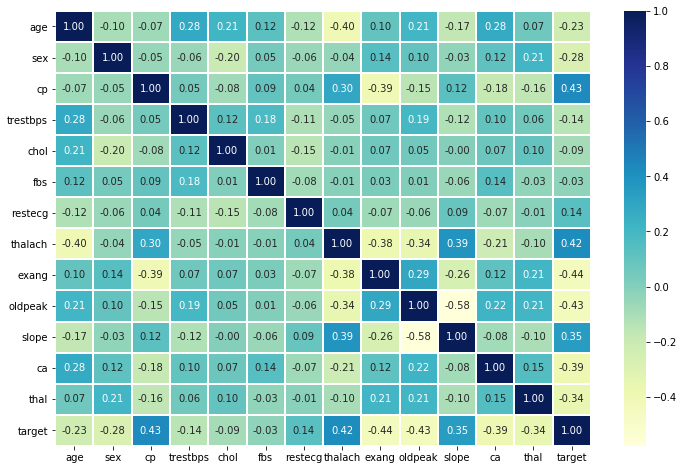

In [20]:
# Plot the  the correlation matrix 
corr_matrix = df.corr()
plt.figure(figsize = (12,8))
sns.heatmap(corr_matrix,
            annot = True,
            linewidths = 1,
            fmt = '.2f',
            cmap = 'YlGnBu');

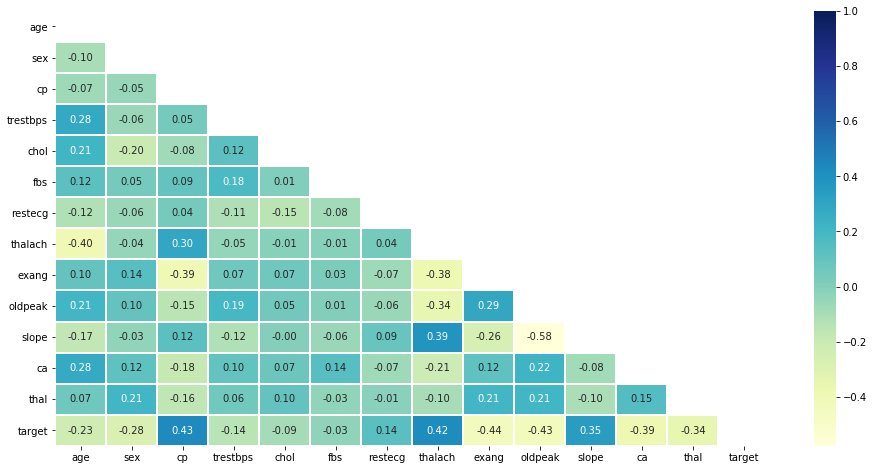

In [23]:
# Make the correlation dioganal 
corr_matrix = df.corr()
plt.figure(figsize = (16,8))
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=np.bool))
sns.heatmap(corr_matrix, 
            mask=mask, 
            annot = True,
            linewidths = 1,
            fmt = '.2f',
            cmap = 'YlGnBu');

#### 5. Modeling

In [24]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [25]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [26]:
# Everything except the target variable 
X = df.drop('target', axis = 1)

# Onlty the target variable 
y = df['target']

In [27]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [28]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [29]:
# Set up the random seed 
np.random.seed(42)

#Split the data into train and test 
X_train, X_test, y_train, y_test =train_test_split(X,
                                                     y, 
                                                     test_size = 0.2) # this is the percentage that is used for the test


In [30]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3


In [31]:
y_train, len(y_train)

(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64,
 242)

In [32]:
#Test data
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [33]:
y_test, len(y_test)

(179    0
 228    0
 111    1
 246    0
 60     1
       ..
 249    0
 104    1
 300    0
 193    0
 184    0
 Name: target, Length: 61, dtype: int64,
 61)

Model choices according to the Scikit-Learn algorithm cheat sheet:

1. Logistic Regression - LogisticRegression()
2. K-Nearest Neighbors - KNeighboursClassifier()
3. RandomForest - RandomForestClassifier()

In [34]:
# Put the models into the dictionary 
models = {'KNN': KNeighborsClassifier(),
         'Logistic Regression': LogisticRegression(),
         'Random Forest': RandomForestClassifier()}

# Create a function and fit the models 
def fit_and_score(models,X_train, X_test, y_train, y_test):
    '''
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    
    '''
    # Random seed for the reproducable result 
    np.random.seed(42)
    
    #Make a list to keep the model scores 
    model_scores = {}
    
    #Loop through the models 
    for name, model in models.items():
        # fit the model to the test
        model.fit(X_train, y_train)
        #Evaluate the model and append its score to model_score 
        model_scores[name] = model.score(X_test, y_test)
    
    return model_scores    

In [35]:
model_scores = fit_and_score(models = models,
                             X_train = X_train,
                             X_test = X_test,
                             y_train = y_train,
                             y_test = y_test)
model_scores

C:\Users\BOBUR\Desktop\ml_course\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNN': 0.6885245901639344,
 'Logistic Regression': 0.8852459016393442,
 'Random Forest': 0.8360655737704918}

####  Model Comparison


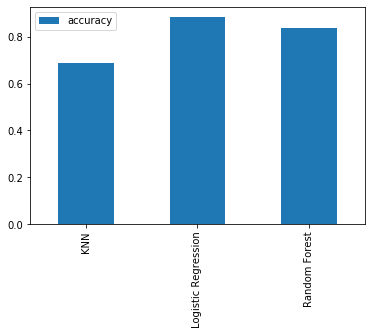

In [36]:
#Lets compare the model 
model_compare = pd.DataFrame(model_scores, index = ['accuracy'])
model_compare.T.plot.bar();

### Hyperparameter tuning and cross-validation
 Plan:

* Tune model hyperparameters, see which performs best
* Perform cross-validation
* Plot ROC curves
* Make a confusion matrix
* Get precision, recall and F1-score metrics
* Find the most important model features

Tune KNeighborsClassifier (K-Nearest Neighbors or KNN) by hand with the default is 5 (n_neigbors=5).


In [37]:
# Create a list of the train scores 
train_scores = []

# Create a list of the test scores 
test_scores = []

# Create a list of different values for n_neighbors 
neighbors = range(1,21) # get the 20 random neighbors 

# Setup alghorithm
knn = KNeighborsClassifier()

# Loop through different neighbor values 
for i in neighbors:
    knn.set_params(n_neighbors = i) # set neighbor values 
    
    #Fit the algorithm 
    knn.fit(X_train,y_train)
    
    #Update the train_score 
    train_scores.append(knn.score(X_train, y_train))
    
    #Update the test_score 
    test_scores.append(knn.score(X_test,y_test))


Let's look at KNN's train scores.

In [38]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

Maximum KNN score on the test data 75.41%


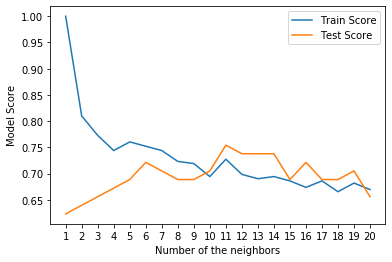

In [39]:
plt.plot(neighbors, train_scores, label = 'Train Score')
plt.plot(neighbors, test_scores, label = 'Test Score')
plt.xticks(np.arange(1,21,1))
plt.xlabel('Number of the neighbors')
plt.ylabel('Model Score')
plt.legend()

print(f"Maximum KNN score on the test data {max(test_scores)*100:.2f}%")

Looking at the graph, n_neighbors = 11 seems best.

Result, the KNN's model performance didn't get near what LogisticRegression or the RandomForestClassifier did.

Because of this, KNN will be discarded and focus will be  on the other two.


####  Tuning models with with RandomizedSearchCV


In [40]:
#Different logistic Regression Hyperparameter
log_reg_grid = {"C": np.logspace(-4,4,20),
                "solver": ['liblinear']}

# Different RandomForestClassifier hyperparameters 
rf_grid = {'n_estimators': np.arange(10,1000,50),
           'max_depth': [None, 3,5,10],
           'min_samples_split': np.arange(2,20,2),
           'min_samples_leaf': np.arange(1,20,2)}

In [41]:
# Setup the random seed 
np.random.seed(42)

#Setup the random hyperparameter for the RandomSearchCV for logistic regression 
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                            param_distributions = log_reg_grid,
                            cv = 5,
                            n_iter = 20,
                            verbose = True)
#Fit random hyperparameter search model 
rs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.1s finished


In [42]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [43]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

In [44]:
# Setup the random seed 
np.random.seed(42)

# Setup the random hyperparameter search fpr RanfdomForestClassifier 
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions = rf_grid,
                           cv = 5,
                           n_iter = 20,
                           verbose = True)
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.6min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [45]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [46]:
rs_rf.score(X_test, y_test)

0.8688524590163934



Since LogisticRegression is pulling out in front, we'll try tuning it further with GridSearchCV.

#### Tuning a model with GridSearchCV


In [47]:
# Different Logistic Regression Hyperparameters 
log_reg_grid = {"C": np.logspace(-4,4,20),
                "solver": ["liblinear"]}

#Setup the GridSearchCV
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid = log_reg_grid,
                          cv = 5,
                          verbose = True)
#Fit the model
gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.0s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e-04, 2.6...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
      

In [48]:
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [49]:
gs_log_reg.score(X_test,y_test)

0.8852459016393442

In [50]:
# Make predictions on the test data 
y_preds = gs_log_reg.predict(X_test)

In [51]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [52]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

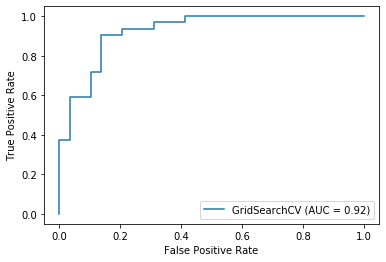

In [53]:
# Plot ROC curve and calulate AUC metric
plot_roc_curve(gs_log_reg, X_test, y_test);

In [54]:
# Confusion Matrix 
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


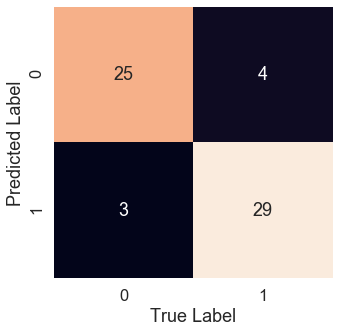

In [55]:
sns.set(font_scale = 1.5)

def plot_conf_mat(y_test,y_preds):
    '''
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    '''
    fig, ax =plt.subplots(figsize = (5,5))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot = True,
                     cbar = False)
    plt.xlabel('True Label')
    plt.ylabel('Predicted Label')

plot_conf_mat(y_test, y_preds)    

In [56]:
#Show the classification report 
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [57]:
# check the best model with a great hyperparameters
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [58]:
# Import the cross-val score
clf = LogisticRegression(C = 0.23357214690901212,
                         solver = 'liblinear')

In [59]:
# Cross - validated Acccuracy
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv = 5,
                         scoring = 'accuracy')

cv_acc

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [60]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8479781420765027

In [61]:
cv_precision = cross_val_score(clf,
                               X,
                               y,
                               cv = 5,
                               scoring = "precision")
cv_precision = np.mean(cv_precision)
cv_precision

0.8215873015873015

In [62]:
# Cross validated recall
cv_recall =cross_val_score(clf,
                           X,
                           y,
                           cv = 5,
                           scoring = 'recall')

cv_recall = np.mean(cv_recall)
cv_recall


0.9272727272727274

In [63]:
#Cross validated F1 score 
cv_f1 = cross_val_score(clf,
                        X,
                        y,
                        cv = 5,
                        scoring = 'f1')
cv_f1 = np.mean(cv_f1)
cv_f1

0.8705403543192143

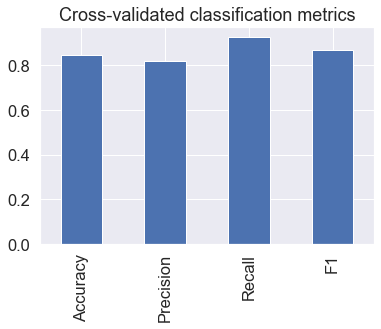

In [64]:
#Vusualize the cross_validated metrics 
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision":cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                           index = [0])

cv_metrics.T.plot.bar(title = "Cross-validated classification metrics",
                    legend = False);

#### Feature importance

In [65]:
# Fit an instance of LogisticRegression 
clf = LogisticRegression(C = 0.23357214690901212,
                         solver = 'liblinear')
clf.fit(X_train, y_train);

In [66]:
#Look how the coefficients are checked 
clf.coef_

array([[ 0.00369922, -0.90424087,  0.67472828, -0.0116134 , -0.00170364,
         0.04787689,  0.33490186,  0.02472938, -0.63120403, -0.57590919,
         0.4709512 , -0.6516535 , -0.69984202]])

In [67]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [68]:
#Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.003699219011760782,
 'sex': -0.9042408714480176,
 'cp': 0.6747282766540338,
 'trestbps': -0.01161340334265323,
 'chol': -0.0017036446360052262,
 'fbs': 0.04787688669240361,
 'restecg': 0.3349018562558094,
 'thalach': 0.024729384743360134,
 'exang': -0.631204028843173,
 'oldpeak': -0.575909185434028,
 'slope': 0.47095119664446533,
 'ca': -0.6516535002884537,
 'thal': -0.6998420233395882}

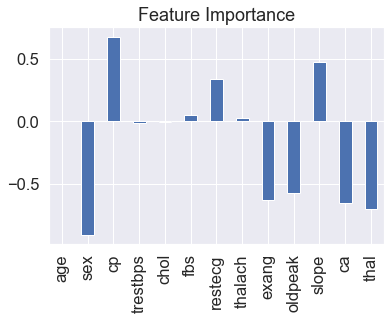

In [69]:
#Let's visualize the feature importance 
feature_df = pd.DataFrame(feature_dict, index =[0])
feature_df.T.plot.bar(title = "Feature Importance", legend = False);

For example, the sex attribute has a negative value of -0.904, which means as the value for sex increases, the target value decreases.

We can see this by comparing the sex column to the target column.

In [70]:
pd.crosstab(df.sex, df.target)

target,0,1
sex,,
0,24,72
1,114,93


In [77]:
# Let's contrast the slope with target 
pd.crosstab(df.slope, df.target)

target,0,1
slope,,
0,12,9
1,91,49
2,35,107
